In [27]:
%matplotlib inline

In [28]:
import pandas as pd
from ast import literal_eval

df = pd.read_csv('twitter_data.csv')

# Function to extract and clean hashtags
def clean_hashtags(hashtag_string):
    try:
        hashtag_dicts = literal_eval(hashtag_string)
        hashtags = [d['text'].lower() for d in hashtag_dicts]  # Convert to lowercase
        hashtags = [h.translate(str.maketrans('', '', '!@#$%^&*()[]{};:,./<>?\|`~-=_+')) for h in hashtags]  # Remove special chars
        return hashtags
    except:
        return []  # In case of an error

# Apply the function to the 'hashtags' column
df['cleaned_hashtags'] = df['hashtags'].apply(clean_hashtags)

# Explode the hashtags into separate rows
hashtags_exploded = df['cleaned_hashtags'].explode()

# Count the occurrences of each hashtag
hashtag_counts = hashtags_exploded.value_counts()

# Display the counts
print(hashtag_counts)


cleaned_hashtags
roevswade         101332
roevwade           88379
womensrights       79769
abortion           53670
scotus             28126
                   ...  
stopthekilling         1
endfgc                 1
heartspring            1
constution             1
rovermber              1
Name: count, Length: 44751, dtype: int64


In [29]:
len(hashtag_counts)

44751

In [30]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns


# Explode the hashtags into separate rows
hashtags_exploded = df['cleaned_hashtags'].explode()

# Count the occurrences of each hashtag
hashtag_counts = hashtags_exploded.value_counts()

# Convert the counts to a DataFrame
hashtag_counts_df = hashtag_counts.reset_index()
hashtag_counts_df.columns = ['hashtag', 'count']

# Select the top N hashtag to visualize
top_n = 10
top_hashtags = hashtag_counts_df.head(top_n)

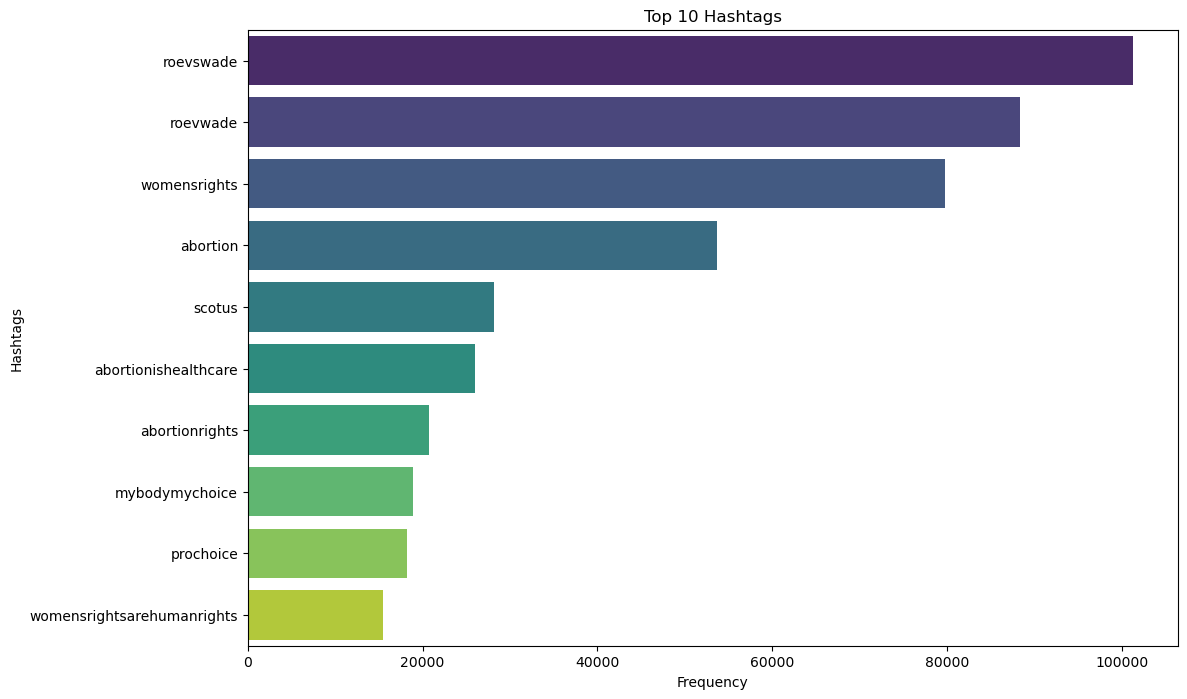

In [31]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='hashtag', data=top_hashtags, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Hashtags')
plt.title(f'Top {top_n} Hashtags')
plt.show()

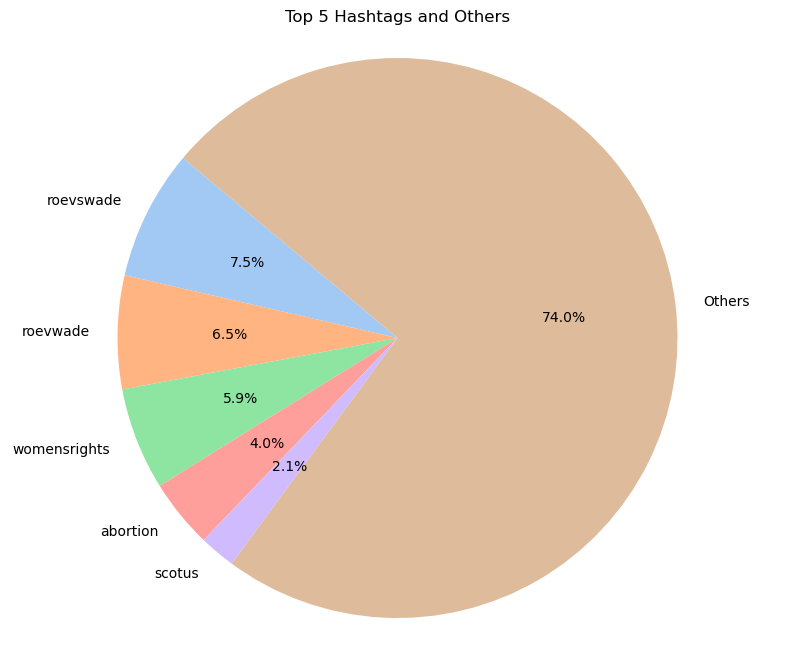

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the frequency of each hashtag
hashtag_freq = df['cleaned_hashtags'].explode().value_counts()

# Prepare data for the pie chart
top_n = 5
top_hashtags = hashtag_freq.head(top_n)
other_hashtags = pd.Series(hashtag_freq.iloc[top_n:].sum(), index=['Others'])

# Combine the top hashtags with the "Others" category
pie_data = pd.concat([top_hashtags, other_hashtags])

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 5 Hashtags and Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [33]:
df2 = pd.read_csv('cleaned_data.csv')

# Apply the function to the 'hashtags' column
df2['cleaned_hashtags'] = df2['hashtags'].apply(clean_hashtags)

# Explode the hashtags into separate rows
hashtags_exploded = df2['cleaned_hashtags'].explode()

# Count the occurrences of each hashtag
hashtag_counts = hashtags_exploded.value_counts()

# Display the counts
print(hashtag_counts)

/var/folders/bg/hdj9jw_j33g1vg7x_rmvr9lc0000gn/T/ipykernel_58508/2671862648.py:1: DtypeWarning: Columns (0,4,9,13,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('cleaned_data.csv')


cleaned_hashtags
roevswade                92176
roevwade                 83274
womensrights             74182
abortion                 50466
scotus                   27093
                         ...  
youareabadass                1
gunshots                     1
humboldtcounty               1
youshouldofexpectedus        1
rovermber                    1
Name: count, Length: 44446, dtype: int64


In [34]:
len(hashtag_counts)

44446

In [35]:
# Explode the hashtags into separate rows
hashtags_exploded = df2['cleaned_hashtags'].explode()

# Count the occurrences of each hashtag
hashtag_counts = hashtags_exploded.value_counts()

# Convert the counts to a DataFrame
hashtag_counts_df = hashtag_counts.reset_index()
hashtag_counts_df.columns = ['hashtag', 'count']

# Select the top N hashtag to visualize
top_n = 10
top_hashtags = hashtag_counts_df.head(top_n)

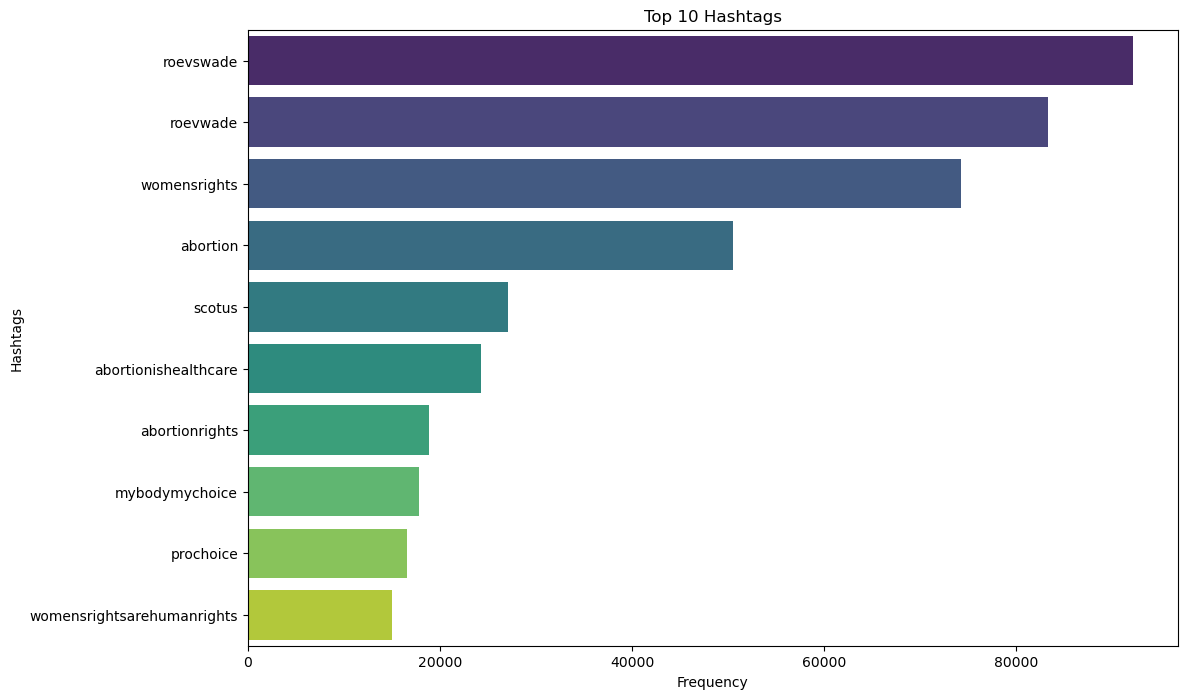

In [36]:
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='hashtag', data=top_hashtags, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Hashtags')
plt.title(f'Top {top_n} Hashtags')
plt.show()

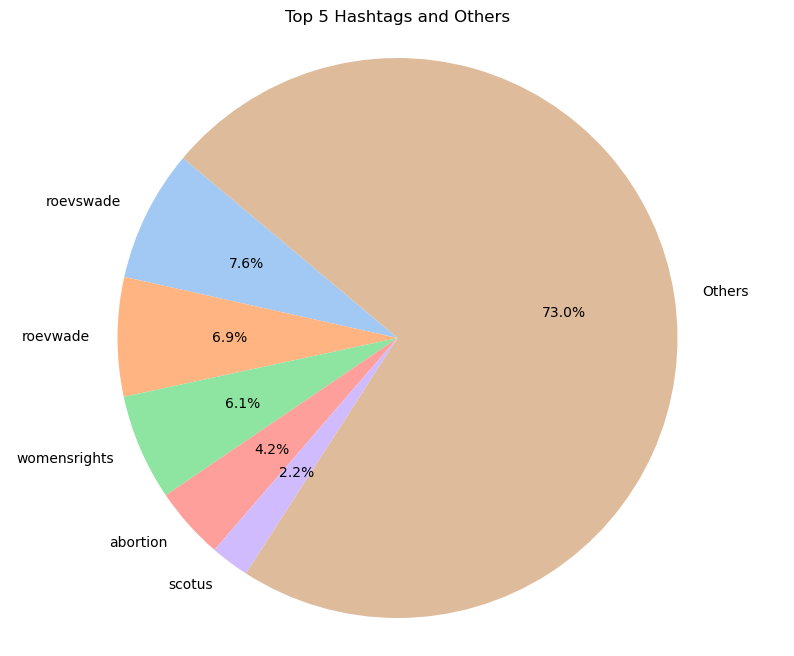

In [37]:
# Get the frequency of each hashtag
hashtag_freq = df2['cleaned_hashtags'].explode().value_counts()

# Prepare data for the pie chart
top_n = 5
top_hashtags = hashtag_freq.head(top_n)
other_hashtags = pd.Series(hashtag_freq.iloc[top_n:].sum(), index=['Others'])

# Combine the top hashtags with the "Others" category
pie_data = pd.concat([top_hashtags, other_hashtags])

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 5 Hashtags and Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()